In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import requests
import gmaps
import os

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Import API key
from config import g_key

# Configure gmaps API key
gmaps.configure(api_key=g_key)

In [2]:
# Files to load
stations_load = "Data/ca_stations_count.csv"
evs_load = "Data/ca_ev_county_counts.csv"
evs_stations_load = "Data/ca_ev_stations.csv"
ca_geoids_load = "Data/ca_geoids.csv"
ratio_load = "Data/ca_ev_stations_ratio.csv"
evs_yr_load = "Data/ca_ev_year_counts.csv"
stations_yr_load = "Data/ca_stations_yr_count.csv"

In [3]:
# Read the California Stations data file and store it in a pandas DataFrame.
stations_df = pd.read_csv(stations_load)
stations_df.sort_values(by=['stations'], inplace=True, ascending=False)
stations_df.head(10)

,stations,county,geoid
0,3193,Los Angeles,6037
1,1546,Santa Clara,6085
2,1531,Orange,6059
3,1295,San Mateo,6081
4,1010,San Diego,6073
5,765,Alameda,6001
6,490,Riverside,6065
7,409,San Francisco,6075
8,384,Sacramento,6067
9,351,San Bernardino,6071


In [4]:
# Read the California Charge Stations Year Counts data file and store it in a pandas DataFrame.
stations_yr_count_df = pd.read_csv(stations_yr_load)
stations_yr_count_df.sort_values(by=['oyear'], inplace=True, ascending=True)
stations_yr_count_df.head(10)

,stations,oyear
0,89,2010
1,96,2011
2,98,2012
3,135,2013
4,108,2014
5,312,2015
6,297,2016
7,244,2017
8,403,2018
9,543,2019


In [5]:
# Read the California Electric Vehicle Year Counts data file and store it in a pandas DataFrame.
evs_yr_count_df = pd.read_csv(evs_yr_load)
evs_yr_count_df.sort_values(by=['ryear'], inplace=True, ascending=True)
evs_yr_count_df.head(10)

,evs,ryear
0,743,2010
1,5662,2011
2,18054,2012
3,51849,2013
4,107983,2014
5,165121,2015
6,229005,2016
7,320644,2017
8,444612,2018
9,555347,2019


In [6]:
# Read the California Electric Count By County data file and store it in a pandas DataFrame.
evs_df = pd.read_csv(evs_load)
evs_df.sort_values(by=['evs'], inplace=True, ascending=False)
evs_df.head(10)

,evs,geoid,county
18,642677,6037,Los Angeles
42,332645,6085,Santa Clara
29,303324,6059,Orange
36,197012,6073,San Diego
0,192172,6001,Alameda
6,102886,6013,Contra Costa
40,102569,6081,San Mateo
32,81505,6065,Riverside
37,62911,6075,San Francisco
35,61962,6071,San Bernardino


In [7]:
# Read the GEOID Code data file and store it in a pandas DataFrame.
ca_geoids_df = pd.read_csv(ca_geoids_load)
ca_geoids_df.head(10)

,geoid,state_abbr,county,state_1
0,6001,CA,Alameda,California
1,6003,CA,Alpine,California
2,6005,CA,Amador,California
3,6007,CA,Butte,California
4,6009,CA,Calaveras,California
5,6011,CA,Colusa,California
6,6013,CA,Contra Costa,California
7,6015,CA,Del Norte,California
8,6017,CA,El Dorado,California
9,6019,CA,Fresno,California


In [8]:
print(ca_geoids_df.dtypes)

geoid          int64
state_abbr    object
county        object
state_1       object
dtype: object


In [9]:
# Read the Charging Station to Electric Vehicle Ratio data file and store it in a pandas DataFrame.
ratio_df = pd.read_csv(ratio_load)
ratio_df.sort_values(by=['evs'], inplace=True, ascending=False)
ratio_df.head(15)

,geoid,county,stations,evs,ratio
0,6037,Los Angeles,3193,642677,0.005
1,6085,Santa Clara,1546,332645,0.005
2,6059,Orange,1531,303324,0.005
4,6073,San Diego,1010,197012,0.005
5,6001,Alameda,765,192172,0.004
11,6013,Contra Costa,298,102886,0.003
3,6081,San Mateo,1295,102569,0.013
6,6065,Riverside,490,81505,0.006
7,6075,San Francisco,409,62911,0.007
9,6071,San Bernardino,351,61962,0.006


(10,)


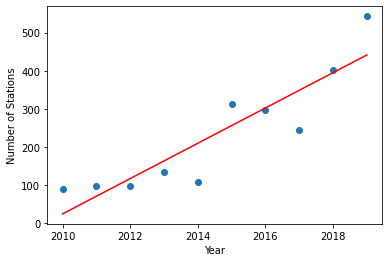

In [10]:
# Linear Regression model using the resampled data
plt.xlabel('Year')
plt.ylabel('Number of Stations')

X = stations_yr_count_df['oyear'].values.reshape(-1,1)
y = stations_yr_count_df.stations
model =  LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(y_pred.shape)

# Scatter Plot Total Charging Stations Over A 8 Years
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

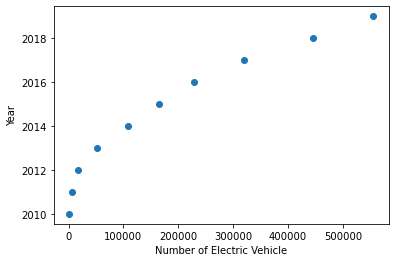

In [11]:
# Scatter Plot Total Electric Vehicles Over A 8 Years
plt.scatter(evs_yr_count_df.evs, evs_yr_count_df.ryear)
plt.xlabel('Number of Electric Vehicle')
plt.ylabel('Year')
plt.show()

(10,)


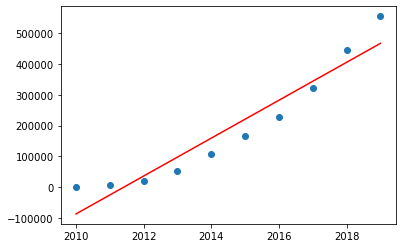

In [12]:
# Electrice Vehicle Registration Linear Regression model using the resampled data 
X = evs_yr_count_df['ryear'].values.reshape(-1,1)
y = evs_yr_count_df.evs
model =  LinearRegression()

# Fitting the model
model.fit(X, y)

# Making predictions using the testing data.
y_pred = model.predict(X)

print(y_pred.shape)

# Create the plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

(10, 1)


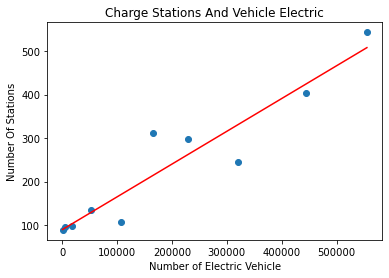

In [13]:
# Charging Stations to Electric Vehicles Linear Regression model using the resampled data 
y = stations_yr_count_df['stations'].values.reshape(-1,1)
X = evs_yr_count_df['evs'].values.reshape(-1,1)
model =  LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(y_pred.shape)
 

# Scatter Plot Charging Station And Total Electric Vehicles Over A 8 Years
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Charge Stations And Vehicle Electric')
plt.xlabel('Number of Electric Vehicle')
plt.ylabel('Number Of Stations')
plt.show()

In [14]:
# Splitting into Train and Test sets into an 70/30 split.
y = stations_yr_count_df['stations'].values.reshape(-1,1)
X = evs_yr_count_df['evs'].values.reshape(-1,1)

# Splitting into Train and Test sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=4)

# print the data
x_train

array([[555347],
       [ 18054],
       [229005],
       [   743],
       [  5662],
       [165121],
       [320644]], dtype=int64)

In [15]:
y_train

array([[543],
       [ 98],
       [297],
       [ 89],
       [ 96],
       [312],
       [244]], dtype=int64)

In [16]:
clf = LinearRegression()


In [17]:
clf.fit(x_train, y_train)

LinearRegression()

In [18]:
#x_test = x_test.values.reshape(-1, 1)
clf.predict(x_test)

array([[138.83200296],
       [436.967169  ],
       [181.44171775]])

In [19]:
# Accourcy Check
clf.score(x_test,y_test)

0.8766345224897881

In [44]:
# Summary
total_evs = evs_yr_count_df['evs'].sum()
evs_2019 = evs_yr_count_df['evs'].sum()
total_stations = stations_yr_count_df['stations'].sum()
stations_mean = stations_yr_count_df['stations'].mean()
stations_mode = stations_df['stations'].mode()

summary = (
    f"----------------------------------------------\n"
    f"Total of Electric Vehicles for2019: {total_evs:,}\n"
    f"Total of Charging Stations as 2019: {total_stations:,}\n"
    f"The Average Of Charging Stations Per County: {stations_mean:,.0f}\n"
    f"----------------------------------------------\n"

)
print(summary)

----------------------------------------------
Total of Electric Vehicles for2019: 1,899,020
Total of Charging Stations as 2019: 2,325
The Average Of Charging Stations Per County: 232
----------------------------------------------

